In [1]:
# Hacer de nuevo tablas de estadisticos con las horas de picos de BM y LLJ
# Buscar definicion de CRMSD, agregar a descripcion de estadisticos
# hacer graficas de Taylor de niveles bajos y altos


In [2]:
import matplotlib.pyplot as plt 
#plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 200
import numpy.ma as ma
import xarray as xr
import pandas as pd
import numpy as np
# ds083 GFS NAM
# p1s1 p2s2 p7s7

In [3]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5'
          '20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_']
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
levlabel = ['30m', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
levs=[30,40,50,100,150,200,250,300,350,400,450,500]
levn=['30','40','50','100','150','200','250','300','350','400','450','500']
t1, t2, t3, t4 = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

expruns[1]

'20120816_d03_gfs05_p1r3'

In [4]:
# READ WRF INTERP DATA

g1r1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'].to_pandas()
g1r3 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'].to_pandas()
g1r5 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'].to_pandas()
g2r1 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'].to_pandas()
g2r3 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'].to_pandas()
g2r5 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'].to_pandas()
n1r1 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'].to_pandas()
n1r3 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'].to_pandas()
n1r5 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'].to_pandas()
n2r1 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'].to_pandas()
n2r3 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'].to_pandas()
n2r5 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'].to_pandas()

drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'].to_pandas()
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'].to_pandas()
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].to_pandas()
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'].to_pandas()
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'].to_pandas()
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].to_pandas()

tvg1r1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'].to_pandas()
tvg1r3 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'].to_pandas()
tvg1r5 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].to_pandas()
tvg2r1 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'].to_pandas()
tvg2r3 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'].to_pandas()
tvg2r5 = xr.open_dataset('interp30/sodar_g2r5.nc')['tv30'].to_pandas()
tvn1r1 = xr.open_dataset('interp30/sodar_n1r1.nc')['tv30'].to_pandas()
tvn1r3 = xr.open_dataset('interp30/sodar_n1r3.nc')['tv30'].to_pandas()
tvn1r5 = xr.open_dataset('interp30/sodar_n1r5.nc')['tv30'].to_pandas()
tvn2r1 = xr.open_dataset('interp30/sodar_n2r1.nc')['tv30'].to_pandas()
tvn2r3 = xr.open_dataset('interp30/sodar_n2r3.nc')['tv30'].to_pandas()
tvn2r5 = xr.open_dataset('interp30/sodar_n2r5.nc')['tv30'].to_pandas()

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4]
sodard =  sread_d.iloc[:,ids][t1:t4]
sodart =  sread_t.iloc[:,ids][t1:t4]


In [5]:
inds = np.append(np.arange(0,25),np.arange(48,73))
indl = np.append(np.arange(24,49),np.arange(72,97))

sea = sodarw.iloc[inds]
llj = sodarw.iloc[indl]

print(sea.shape, llj.shape, indl.shape, inds.shape)


(50, 12) (50, 12) (50,) (50,)


In [6]:
lev = 2

wg1 = pd.DataFrame(g1r1.iloc[:,lev])
wg2 = pd.DataFrame(g1r3.iloc[:,lev])
wg3 = pd.DataFrame(g1r5.iloc[:,lev])
wg4 = pd.DataFrame(g2r1.iloc[:,lev])
wg5 = pd.DataFrame(g2r3.iloc[:,lev])
wg6 = pd.DataFrame(g2r5.iloc[:,lev])
wn1 = pd.DataFrame(n1r1.iloc[:,lev])
wn2 = pd.DataFrame(n1r3.iloc[:,lev])
wn3 = pd.DataFrame(n1r5.iloc[:,lev])
wn4 = pd.DataFrame(n2r1.iloc[:,lev])
wn5 = pd.DataFrame(n2r3.iloc[:,lev])
wn6 = pd.DataFrame(n2r5.iloc[:,lev])



In [7]:
j=0
lev = j
print(lev)
    #          time,lev
r = [sea.iloc[:,lev] for i in range(12)] 
validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
r = [sea.iloc[validt[i],lev] for i in range(12)] 

#          g1r1.iloc[indl,lev][validt]
p = [eval(expnames[i]+'.iloc[indl,lev][validt['+str(i)+']]') for i in range(12)] 

0


In [8]:
r = [sea.iloc[:,lev] for i in range(12)] 
validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
ndim = len(validt[0])
print('valid data '+str(ndim))    
r = [sea.iloc[validt[i],lev] for i in range(12)] 
#          g1r1.iloc[indl,lev][validt]
p = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 

valid data 46


In [9]:
from IPython.display import display
for j in range(12):
    lev = j
    print(lev)
    ######    LLJ    #####
    #          time,lev
    r = [sea.iloc[:,lev] for i in range(12)] 
    validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
    ndim = len(validt[0])
    print('valid data '+str(ndim))    
    rv = [sea.iloc[validt[i],lev] for i in range(12)] 
    #          g1r1.iloc[indl,lev][validt]
    pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
    
    pvm = [np.mean(pv[i]) for i in range(12)] 
    rvm = [np.mean(rv[i]) for i in range(12)]
    p_pm = [(pv[i] - pvm[i]) for i in range(12)]
    r_rm = [(rv[i] - rvm[i]) for i in range(12)]
    crmsd = [np.sqrt(np.average(np.square((p_pm[i]) - (r_rm[i])))) for i in range(12)]
    sdevp = [np.std(pv[i]) for i in range(12)]
    sdevr = [np.std(rv[i]) for i in range(12)]
    #  ratio:  Case_Variance/Reference_Variance   ratio  = sqrt(tvar/rvar)
    ratio = [np.sqrt(np.var(pv[i]) / np.var(rv[i])) for i in range(12)]
    bias = [(np.average(pv[i]) - np.average(rv[i])) for i in range(12)]
    sdev = [[sdevr[i], sdevp[i]] for i in range(12)];
    ccoef =[ np.corrcoef(rv[i], pv[i])[1,0] for i in range(12)]
    sdev = np.array(np.append(sdevr[0], sdevp))
    crmsd = np.array(np.append(0, crmsd))
    ccoef = np.array(np.append(1, ccoef))
    bias = np.append(0,bias)
    ratio = np.append(1,ratio)
    #print(expnames[0], sdev[0], crmsd[0], ccoef[0])
    #print(np.size(r[0]), np.size(p[0]))

    ######    LOW LEVEL JET    #####
    xnames=['SB '+levlabel[lev]]+expnames
    media = np.array(np.append(rvm[0], pvm))
    import pandas as pd
    pd.options.display.float_format = '{:.3f},'.format
    print ('SB '+levlabel[lev])
    pd.DataFrame([media,bias,sdev,ratio,ccoef], columns=xnames, index=['media','bias','sdev','ratio','ccoef'])
    display(pd.DataFrame([media,ratio,ccoef,sdev,bias], columns=xnames, index=['media','ratio','ccoef','sdev','bias']))
    data=pd.DataFrame([media,ratio,ccoef,sdev,bias], columns=xnames, index=['media','ratio','ccoef','sdev','bias'])
    data.to_pickle(path=str(j)+'_file.pkl')
rlljm = [[3.03], [2.52], [2.95], [3.86], [4.49], [4.88], [5.39], [5.41], [6.46], [6.93], [7.36], [7.21]]

0
valid data 46
SB 30m


,SB 30m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"4.281,","4.306,","4.364,","4.214,","4.447,","4.563,","4.393,","4.783,","4.865,","4.734,","4.848,","4.957,","4.922,"
ratio,"1.000,","0.843,","0.850,","0.825,","1.061,","1.026,","1.037,","1.004,","1.014,","0.988,","1.144,","1.123,","1.139,"
ccoef,"1.000,","0.733,","0.714,","0.748,","0.746,","0.730,","0.780,","0.703,","0.692,","0.712,","0.683,","0.766,","0.707,"
sdev,"2.314,","1.950,","1.968,","1.909,","2.456,","2.375,","2.400,","2.323,","2.347,","2.287,","2.648,","2.598,","2.636,"
bias,"0.000,","0.025,","0.083,","-0.067,","0.166,","0.282,","0.112,","0.502,","0.584,","0.452,","0.567,","0.676,","0.641,"


1
valid data 50
SB 40m


,SB 40m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"3.402,","4.223,","4.274,","4.125,","4.347,","4.485,","4.310,","4.680,","4.749,","4.629,","4.731,","4.842,","4.828,"
ratio,"1.000,","0.971,","0.989,","0.950,","1.191,","1.153,","1.158,","1.150,","1.169,","1.126,","1.282,","1.262,","1.258,"
ccoef,"1.000,","0.775,","0.755,","0.777,","0.795,","0.763,","0.800,","0.740,","0.741,","0.765,","0.729,","0.798,","0.750,"
sdev,"2.142,","2.079,","2.118,","2.034,","2.551,","2.470,","2.480,","2.464,","2.503,","2.412,","2.746,","2.702,","2.694,"
bias,"0.000,","0.820,","0.872,","0.723,","0.945,","1.082,","0.908,","1.278,","1.347,","1.227,","1.329,","1.439,","1.425,"


2
valid data 50
SB 50m


,SB 50m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"3.976,","4.351,","4.408,","4.246,","4.476,","4.625,","4.444,","4.827,","4.893,","4.764,","4.875,","4.993,","4.982,"
ratio,"1.000,","0.900,","0.919,","0.879,","1.102,","1.066,","1.066,","1.067,","1.084,","1.045,","1.176,","1.154,","1.144,"
ccoef,"1.000,","0.749,","0.722,","0.749,","0.788,","0.760,","0.794,","0.726,","0.719,","0.741,","0.726,","0.804,","0.748,"
sdev,"2.376,","2.137,","2.182,","2.089,","2.618,","2.532,","2.532,","2.534,","2.574,","2.482,","2.794,","2.741,","2.717,"
bias,"0.000,","0.375,","0.432,","0.270,","0.500,","0.649,","0.468,","0.851,","0.917,","0.788,","0.899,","1.017,","1.006,"


3
valid data 50
SB 100m


,SB 100m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"4.592,","4.752,","4.810,","4.647,","5.002,","5.163,","4.953,","5.307,","5.355,","5.174,","5.430,","5.556,","5.591,"
ratio,"1.000,","1.063,","1.074,","1.031,","1.272,","1.237,","1.229,","1.259,","1.275,","1.234,","1.336,","1.303,","1.251,"
ccoef,"1.000,","0.754,","0.729,","0.746,","0.793,","0.757,","0.783,","0.745,","0.719,","0.745,","0.719,","0.785,","0.745,"
sdev,"2.206,","2.345,","2.368,","2.275,","2.806,","2.730,","2.711,","2.778,","2.812,","2.722,","2.947,","2.874,","2.759,"
bias,"0.000,","0.160,","0.218,","0.055,","0.410,","0.571,","0.361,","0.715,","0.763,","0.582,","0.838,","0.964,","0.999,"


4
valid data 50
SB 150m


,SB 150m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.297,","4.759,","4.818,","4.701,","5.263,","5.379,","5.165,","5.406,","5.420,","5.196,","5.669,","5.785,","5.842,"
ratio,"1.000,","1.215,","1.191,","1.169,","1.399,","1.370,","1.384,","1.435,","1.431,","1.403,","1.499,","1.452,","1.384,"
ccoef,"1.000,","0.708,","0.689,","0.697,","0.732,","0.690,","0.727,","0.706,","0.678,","0.704,","0.695,","0.736,","0.715,"
sdev,"1.992,","2.420,","2.372,","2.328,","2.788,","2.728,","2.757,","2.859,","2.851,","2.795,","2.986,","2.892,","2.757,"
bias,"0.000,","-0.538,","-0.479,","-0.596,","-0.035,","0.082,","-0.132,","0.109,","0.122,","-0.101,","0.372,","0.488,","0.545,"


5
valid data 50
SB 200m


,SB 200m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.532,","4.614,","4.696,","4.579,","5.257,","5.372,","5.153,","5.320,","5.310,","5.064,","5.659,","5.774,","5.784,"
ratio,"1.000,","1.213,","1.176,","1.169,","1.387,","1.347,","1.382,","1.441,","1.417,","1.400,","1.517,","1.443,","1.420,"
ccoef,"1.000,","0.687,","0.668,","0.687,","0.672,","0.649,","0.700,","0.673,","0.635,","0.672,","0.660,","0.691,","0.662,"
sdev,"1.999,","2.425,","2.349,","2.336,","2.771,","2.691,","2.761,","2.880,","2.831,","2.798,","3.031,","2.884,","2.838,"
bias,"0.000,","-0.917,","-0.836,","-0.953,","-0.275,","-0.159,","-0.379,","-0.211,","-0.221,","-0.468,","0.127,","0.242,","0.253,"


6
valid data 50
SB 250m


,SB 250m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.632,","4.443,","4.527,","4.397,","5.098,","5.261,","5.003,","5.112,","5.122,","4.866,","5.507,","5.615,","5.609,"
ratio,"1.000,","1.149,","1.120,","1.118,","1.352,","1.303,","1.345,","1.394,","1.360,","1.338,","1.499,","1.414,","1.426,"
ccoef,"1.000,","0.667,","0.660,","0.672,","0.655,","0.653,","0.686,","0.689,","0.657,","0.692,","0.681,","0.703,","0.662,"
sdev,"2.059,","2.366,","2.307,","2.303,","2.784,","2.683,","2.769,","2.870,","2.801,","2.755,","3.087,","2.912,","2.936,"
bias,"0.000,","-1.189,","-1.105,","-1.235,","-0.534,","-0.371,","-0.629,","-0.520,","-0.510,","-0.766,","-0.125,","-0.017,","-0.023,"


7
valid data 48
SB 300m


,SB 300m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.809,","4.313,","4.397,","4.264,","5.004,","5.151,","4.884,","4.938,","4.960,","4.717,","5.409,","5.518,","5.538,"
ratio,"1.000,","1.054,","1.029,","1.033,","1.275,","1.232,","1.281,","1.314,","1.285,","1.246,","1.454,","1.374,","1.385,"
ccoef,"1.000,","0.644,","0.635,","0.667,","0.601,","0.595,","0.649,","0.649,","0.615,","0.660,","0.638,","0.653,","0.617,"
sdev,"2.183,","2.302,","2.246,","2.255,","2.783,","2.689,","2.797,","2.868,","2.805,","2.720,","3.174,","3.001,","3.023,"
bias,"0.000,","-1.496,","-1.412,","-1.545,","-0.805,","-0.658,","-0.925,","-0.871,","-0.849,","-1.092,","-0.400,","-0.291,","-0.271,"


8
valid data 43
SB 350m


,SB 350m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"6.326,","4.243,","4.313,","4.178,","4.973,","5.039,","4.834,","4.817,","4.797,","4.591,","5.380,","5.542,","5.543,"
ratio,"1.000,","1.012,","0.978,","0.991,","1.244,","1.228,","1.274,","1.328,","1.317,","1.240,","1.522,","1.438,","1.445,"
ccoef,"1.000,","0.737,","0.717,","0.752,","0.655,","0.653,","0.723,","0.706,","0.662,","0.719,","0.697,","0.725,","0.675,"
sdev,"2.170,","2.197,","2.124,","2.151,","2.699,","2.665,","2.765,","2.882,","2.859,","2.692,","3.304,","3.120,","3.136,"
bias,"0.000,","-2.083,","-2.013,","-2.148,","-1.354,","-1.287,","-1.492,","-1.509,","-1.529,","-1.735,","-0.946,","-0.784,","-0.784,"


9
valid data 31
SB 400m


,SB 400m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"7.057,","4.065,","4.094,","4.047,","4.460,","4.412,","4.410,","4.429,","4.558,","4.360,","5.156,","5.330,","5.276,"
ratio,"1.000,","0.801,","0.802,","0.782,","0.966,","0.954,","1.004,","1.026,","1.089,","0.979,","1.293,","1.213,","1.186,"
ccoef,"1.000,","0.767,","0.727,","0.792,","0.713,","0.712,","0.765,","0.719,","0.669,","0.783,","0.683,","0.733,","0.668,"
sdev,"2.286,","1.831,","1.832,","1.787,","2.208,","2.181,","2.294,","2.344,","2.488,","2.238,","2.956,","2.772,","2.709,"
bias,"0.000,","-2.992,","-2.964,","-3.010,","-2.597,","-2.645,","-2.647,","-2.628,","-2.499,","-2.697,","-1.901,","-1.727,","-1.781,"


10
valid data 11
SB 450m


,SB 450m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"7.809,","3.716,","3.927,","3.583,","4.115,","4.009,","3.832,","4.392,","4.977,","4.199,","5.412,","5.655,","5.383,"
ratio,"1.000,","0.448,","0.467,","0.423,","0.688,","0.675,","0.744,","0.785,","0.897,","0.796,","1.101,","0.939,","1.017,"
ccoef,"1.000,","0.878,","0.859,","0.849,","0.608,","0.599,","0.666,","0.724,","0.719,","0.784,","0.704,","0.792,","0.718,"
sdev,"2.879,","1.291,","1.344,","1.217,","1.982,","1.945,","2.141,","2.260,","2.581,","2.293,","3.171,","2.702,","2.927,"
bias,"0.000,","-4.093,","-3.882,","-4.226,","-3.694,","-3.800,","-3.977,","-3.418,","-2.832,","-3.610,","-2.397,","-2.154,","-2.426,"


11
valid data 2
SB 500m


,SB 500m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.730,","2.625,","3.141,","2.664,","1.809,","2.626,","1.800,","1.563,","2.002,","1.325,","2.021,","2.300,","1.665,"
ratio,"1.000,","0.475,","0.245,","0.346,","0.116,","1.393,","0.263,","0.182,","0.314,","0.395,","0.455,","0.355,","1.251,"
ccoef,"1.000,","1.000,","1.000,","-1.000,","1.000,","-1.000,","1.000,","-1.000,","1.000,","1.000,","1.000,","1.000,","1.000,"
sdev,"0.800,","0.380,","0.196,","0.277,","0.093,","1.115,","0.210,","0.145,","0.251,","0.316,","0.364,","0.284,","1.001,"
bias,"0.000,","-3.105,","-2.589,","-3.066,","-3.921,","-3.104,","-3.930,","-4.167,","-3.728,","-4.405,","-3.709,","-3.430,","-4.065,"


In [10]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
import numpy as np
b = np.zeros((12,12))
r = np.zeros((12,12))
rv= np.zeros((12,12))
validt = np.zeros((12,12))
p = np.zeros((12,12))
pm = np.zeros((12,12))
rm = np.zeros((12,12))
ppm = np.zeros((12,12))
rrm = np.zeros((12,12))

for lev in range(12):
    for t in range(12):
        r = [llj.iloc[:,lev] for i in range(12)] 
        validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
        rv= [llj.iloc[validt[i],lev] for i in range(12)] 
        p = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        pv= [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        pm[lev][t] = np.nanmean(p[t]) 
        rm[lev][t] = np.nanmean(r[t])     
        b[lev][t]=np.mean( np.mean(p[t]) )
                

print(pm, '\n')
print(rm, '\n')
print(crmsd)

[[4.11 4.14 4.02 4.24 4.35 4.20 4.59 4.66 4.54 4.61 4.73 4.72]
 [4.22 4.27 4.12 4.35 4.48 4.31 4.68 4.75 4.63 4.73 4.84 4.83]
 [4.35 4.41 4.25 4.48 4.62 4.44 4.83 4.89 4.76 4.87 4.99 4.98]
 [4.75 4.81 4.65 5.00 5.16 4.95 5.31 5.36 5.17 5.43 5.56 5.59]
 [4.76 4.82 4.70 5.26 5.38 5.17 5.41 5.42 5.20 5.67 5.79 5.84]
 [4.61 4.70 4.58 5.26 5.37 5.15 5.32 5.31 5.06 5.66 5.77 5.78]
 [4.28 4.35 4.23 4.90 5.06 4.80 4.90 4.90 4.64 5.32 5.44 5.43]
 [4.28 4.32 4.23 4.92 5.07 4.82 4.89 4.94 4.68 5.39 5.49 5.50]
 [4.03 4.05 3.99 4.61 4.74 4.53 4.53 4.66 4.38 5.25 5.33 5.34]
 [3.90 3.93 3.90 4.31 4.35 4.30 4.35 4.61 4.34 5.45 5.46 5.36]
 [3.87 3.88 3.86 4.16 4.15 4.15 4.44 4.91 4.47 5.58 5.61 5.33]
 [3.93 3.97 3.98 4.00 3.99 4.07 3.87 4.33 3.90 5.18 5.19 4.81]] 

[[3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04]
 [2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52]
 [2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95]
 [3.86 3.86 3.86 3.86 3.86 3.86 3.86 3.86 3.86 3.86 

In [11]:
from collections import OrderedDict
import skill_metrics as sm

for j in range(12):
    print('\n', j)
    ######    SB    #####
    #          time,lev
    r = [sea.iloc[:,j]]
    #validt = np.where(~r.isnan())
    validt = np.argwhere(~np.isnan(r))[:,1]
    #print(validt)

    pred = sea.iloc[validt,j]
    #pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
    ref = sodarw.iloc[validt,j]
    stats = OrderedDict()

    # Get Valid Times
    stats['validT'] = validt.shape[0]
    print('ValidTimes = ' + str(stats['validT']))
    
    # Get bias
    stats['bias'] = sm.bias(pred,ref)
    print('Bias = ' + str(stats['bias']))
    #
    ## Get Root-Mean-Square-Deviation (RMSD)
    stats['rmsd'] = sm.rmsd(pred,ref)
    print('RMSD = ' + str(stats['rmsd']))
    #
    ## Get Centered Root-Mean-Square-Deviation (CRMSD)
    stats['crmsd'] = sm.centered_rms_dev(pred,ref)
    print('CRMSD = ' + str(stats['crmsd']))
    #
    ## Get Standard Deviation (SDEV)
    stats['sdev'] = np.std(pred)
    print('SDEV = ' + str(stats['sdev']))
    #
    ## Get correlation coefficient (r)
    ccoef = np.corrcoef(pred,ref)
    stats['ccoef'] = ccoef[0,1]
    print('r = ' + str(stats['ccoef']))



 0
ValidTimes = 46
Bias = 1.0510869565217407
RMSD = 0.0
CRMSD = 0.7748715847923138
SDEV = 2.314393739998212
r = nan

 1
ValidTimes = 50
Bias = 0.9218000000000006
RMSD = 0.0
CRMSD = 0.6773818934692606
SDEV = 2.141925572936651
r = 0.52706886109808

 2
ValidTimes = 50
Bias = 1.1099999999999994
RMSD = 0.0
CRMSD = 0.815680084346798
SDEV = 2.375854280043286
r = 0.3395475158630283

 3
ValidTimes = 50
Bias = 1.1473999999999998
RMSD = 0.0
CRMSD = 0.8431633592608254
SDEV = 2.206062555776694
r = 0.3635807701783385

 4
ValidTimes = 50
Bias = 1.221799999999999
RMSD = 0.0
CRMSD = 0.8978359703197454
SDEV = 1.9920231323958062
r = 0.3179430007704611

 5
ValidTimes = 50
Bias = 1.1247999999999978
RMSD = 0.0
CRMSD = 0.8265558188047539
SDEV = 1.9986188831290475
r = 0.3722131798610789

 6
ValidTimes = 50
Bias = 0.8534893617021293
RMSD = 0.0
CRMSD = 0.6271840311191783
SDEV = 2.059071635470704
r = nan

 7
ValidTimes = 48
Bias = 1.1370390070921985
RMSD = 0.0
CRMSD = 0.8368380505270958
SDEV = 2.183384064296115

In [12]:
len(pred)

2

In [13]:
from collections import OrderedDict
import skill_metrics as sm

valts = np.zeros((12,12))
biass = np.zeros((12,12))
rmsds = np.zeros((12,12))
crmsds = np.zeros((12,12))
sdevs = np.zeros((12,12))
corrs = np.zeros((12,12))
ratio = np.zeros((12,12))
exns = np.empty([12, 12], dtype="S9")
media = np.zeros((12,13))
ncl_crmsd = np.zeros((12,12))
ncl_ratio = np.zeros((12,12))

# Read data from pickle file
#data = load_obj('target_data')
#pred = data.pred1['data']
#ref = data.ref['data']
for exn in range(12):
    for lev in range(12):
        print('\n exp '+expnames[exn], '  ', levlabel[lev])
        exns[lev][exn] = (expnames[exn]+' '+levlabel[lev])
        ######    LLJ    #####
        #          time,lev
        r = [sea.iloc[:,lev]]
        #validt = np.where(~r.isnan())
        validt = np.argwhere(~np.isnan(r))[:,1]
        #print(validt)

        #pred = g1r1.iloc[validt,j]
        predm = eval(expnames[exn]+'.iloc[inds,lev]')
        pred = predm[validt]
        #pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        ref = sea.iloc[validt,lev]
        stats = OrderedDict()

        media[lev][exn+1] = np.nanmean(pred)
        media[lev][0]  = np.nanmean(ref)
        
        # Get Valid Times
        print(validt.shape[0])
        valts[lev][exn] = validt.shape[0]

        # Get bias
        stats['bias'] = sm.bias(pred,ref)
        print('Bias = ' + str(stats['bias']))
        biass[lev][exn] = stats['bias']
        
        ## Get Root-Mean-Square-Deviation (RMSD)
        stats['rmsd'] = sm.rmsd(pred,ref)
        print('RMSD = ' + str(stats['rmsd']))
        rmsds[lev][exn] = stats['rmsd']
        
        ## Get Centered Root-Mean-Square-Deviation (CRMSD)
        stats['crmsd'] = sm.centered_rms_dev(pred,ref)
        print('CRMSD = ' + str(stats['crmsd']))
        crmsds[lev][exn] = stats['crmsd']
        
        ## NCL CRMSD
        fn_f = pred - np.mean(pred)
        rn_r = ref - np.mean(ref)
        ncl_crmsd[lev][exn] = np.sqrt(np.var(fn_f - rn_r))

        ## NCL Ratio
        rvar   = np.var(ref)  
        tvar   = np.var(pred) 
        ncl_ratio[lev][exn]   = np.sqrt(tvar/rvar)  

        
        ## Get Standard Deviation (SDEV)
        stats['sdev'] = np.std(pred)
        print('SDEV = ' + str(stats['sdev']))
        sdevs[lev][exn] = stats['sdev']
        
        ## Get correlation coefficient (r)
        ccoef = np.corrcoef(pred,ref)
        stats['ccoef'] = ccoef[0,1]
        print('r = ' + str(stats['ccoef']))
        corrs[lev][exn] = stats['ccoef']
        ratio[lev][exn] = np.sqrt(np.var(pred / ref))
        #Revisar el calculo de ratio

        # https://www.ncl.ucar.edu/Applications/Scripts/taylor_stats.ncl 
        # http://www.ncl.ucar.edu/Applications/Scripts/taylor_stats.ncl
        # https://numpy.org/doc/stable/reference/generated/numpy.var.html
        # https://www.ncl.ucar.edu/Document/Functions/Contributed/pattern_cor.shtml
        # https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2000JD900719
        # https://www.ncl.ucar.edu/Document/Functions/Contributed/pattern_cor.shtml


 exp g1r1    30m
46
Bias = 0.02496239040208703
RMSD = 1.5958985170122038
CRMSD = 1.5957032778380764
SDEV = 1.9502792358398438
r = 0.7326270968631282

 exp g1r1    40m
50
Bias = 0.8204772308349599
RMSD = 1.6371402172089582
CRMSD = 1.4167026444868593
SDEV = 2.078948974609375
r = 0.7750841011976154

 exp g1r1    50m
50
Bias = 0.3752542579650866
RMSD = 1.6566717907142867
CRMSD = 1.6136125724875956
SDEV = 2.137221574783325
r = 0.7492184899984299

 exp g1r1    100m
50
Bias = 0.15964222717285192
RMSD = 1.6105336637640326
CRMSD = 1.6026020404894008
SDEV = 2.3450233936309814
r = 0.7536351279835154

 exp g1r1    150m
50
Bias = -0.5381901618957503
RMSD = 1.814457518903053
CRMSD = 1.7328034594115023
SDEV = 2.420125722885132
r = 0.7075951212121893

 exp g1r1    200m
50
Bias = -0.9172153488159154
RMSD = 2.014579366073206
CRMSD = 1.7936682460471276
SDEV = 2.4249653816223145
r = 0.686843739970602

 exp g1r1    250m
50
Bias = -1.1889529533386236
RMSD = 2.180758428426142
CRMSD = 1.8281413483803
SDEV = 

 exp g2r3    400m
31
Bias = -2.6446350165336368
RMSD = 3.1424629288917822
CRMSD = 1.6973444283449328
SDEV = 2.1810970306396484
r = 0.712125160492676

 exp g2r3    450m
11
Bias = -3.8001845446499916
RMSD = 4.4500793360978035
CRMSD = 2.3155565823182918
SDEV = 1.9448400735855103
r = 0.5991924685551132

 exp g2r3    500m
2
Bias = -3.1039154338836674
RMSD = 3.646922736475722
CRMSD = 1.914616096019746
SDEV = 1.1146161556243896
r = -1.0

 exp g2r5    30m
46
Bias = 0.1116585383207882
RMSD = 1.5702334807067935
CRMSD = 1.5662584669331272
SDEV = 2.399869918823242
r = 0.7798206555973165

 exp g2r5    40m
50
Bias = 0.9082090690612783
RMSD = 1.7496769939652081
CRMSD = 1.4955017841775968
SDEV = 2.479969024658203
r = 0.8002363932332017

 exp g2r5    50m
50
Bias = 0.4678588951110827
RMSD = 1.649909331250577
CRMSD = 1.5821849441902989
SDEV = 2.531582832336426
r = 0.7939157651075183

 exp g2r5    100m
50
Bias = 0.3611912803649906
RMSD = 1.726513892202916
CRMSD = 1.6883100827329427
SDEV = 2.71076202392578

RMSD = 2.2799660161670277
CRMSD = 2.276429688619938
SDEV = 3.0310537815093994
r = 0.6602621991791263

 exp n2r1    250m
50
Bias = -0.12530425262451228
RMSD = 2.2633098061044383
CRMSD = 2.2598384848259796
SDEV = 3.0869927406311035
r = 0.6814009594354526

 exp n2r1    300m
48
Bias = -0.4000112978617354
RMSD = 2.4828042302674302
CRMSD = 2.4503691082693475
SDEV = 3.17445707321167
r = 0.637711696818245

 exp n2r1    350m
43
Bias = -0.9461220759014761
RMSD = 2.554039832238528
CRMSD = 2.3723345966923666
SDEV = 3.3040263652801514
r = 0.6971967588972189

 exp n2r1    400m
31
Bias = -1.900781447502875
RMSD = 2.8877117096153087
CRMSD = 2.1739152999422977
SDEV = 2.9557082653045654
r = 0.6834531075622005

 exp n2r1    450m
11
Bias = -2.397013482180509
RMSD = 3.35183695046422
CRMSD = 2.3428911315380807
SDEV = 3.1709020137786865
r = 0.7040402205069177

 exp n2r1    500m
2
Bias = -3.7085819053649907
RMSD = 3.734109977931391
CRMSD = 0.43588660955429515
SDEV = 0.36411339044570923
r = 1.0

 exp n2r3    3

In [14]:
lev = 0
r = [sea.iloc[:,lev]]
#validt = np.where(~r.isnan())
validt = np.argwhere(~np.isnan(r))[:,1]
#print(validt)

#pred = g1r1.iloc[validt,j]
pred = eval(expnames[exn]+'.iloc[inds,lev]')
pred = pred[validt]
#pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
ref = sea.iloc[validt,lev]
stats = OrderedDict()

# Get Valid Times
print(validt.shape[0])
valts[lev][exn] = validt.shape[0]

# Get bias
stats['bias'] = sm.bias(pred,ref)
print('Bias = ' + str(stats['bias']))
biass[lev][exn] = stats['bias']

46
Bias = 0.6406645426542843


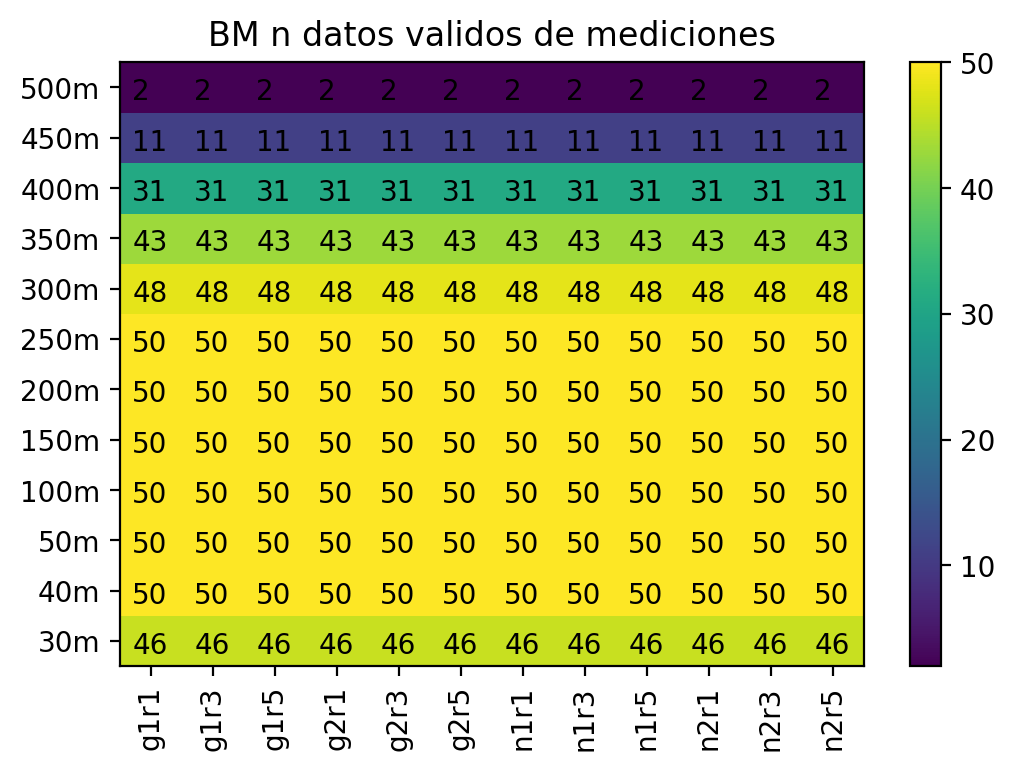

In [15]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(valts, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.0f}'.format(valts[y,x]), (x+0.2, y+0.25))
plt.title('BM n datos validos de mediciones');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

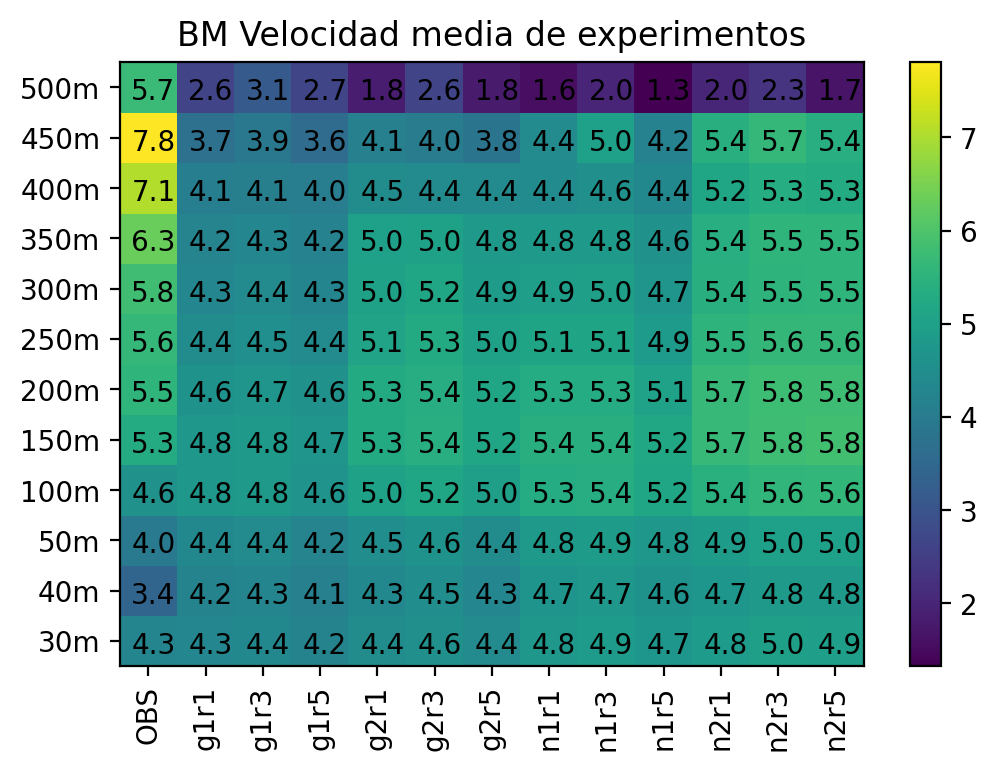

In [16]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(media, cmap=cmap)

for x in range(13):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(media[y,x]), (x+0.2, y+0.25))
plt.title('BM Velocidad media de experimentos');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(13), obsexpnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

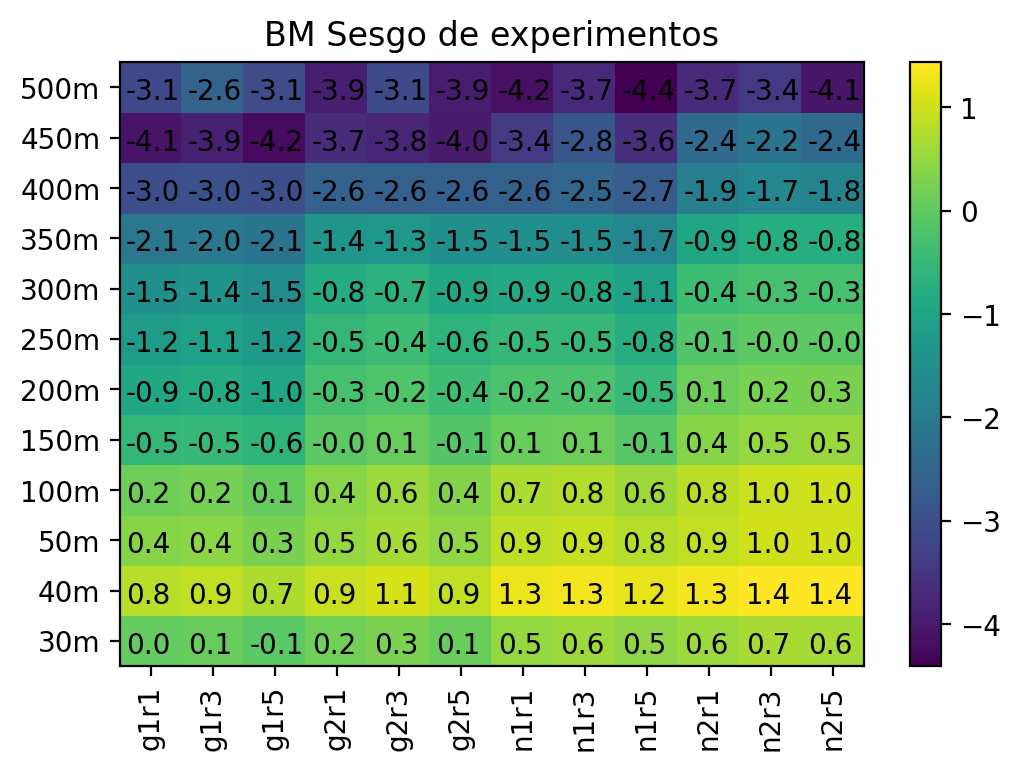

In [17]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(biass, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(biass[y,x]), (x+0.1, y+0.25))
plt.title('BM Sesgo de experimentos');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

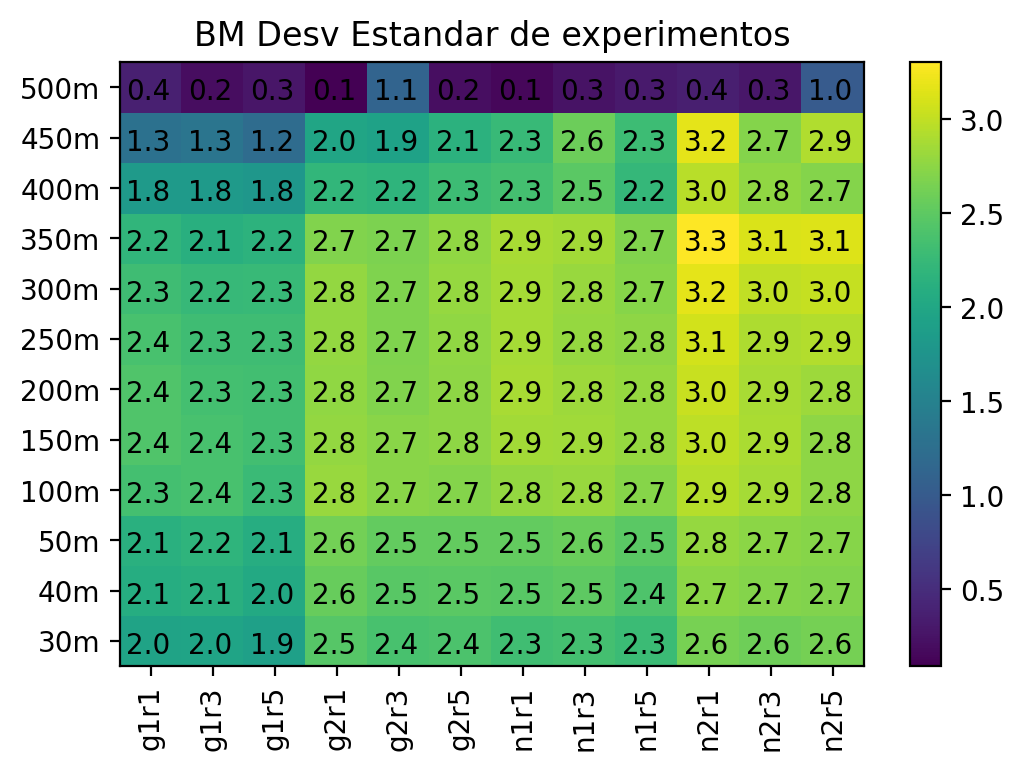

In [18]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(sdevs, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(sdevs[y,x]), (x+0.1, y+0.25))
plt.title('BM Desv Estandar de experimentos');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

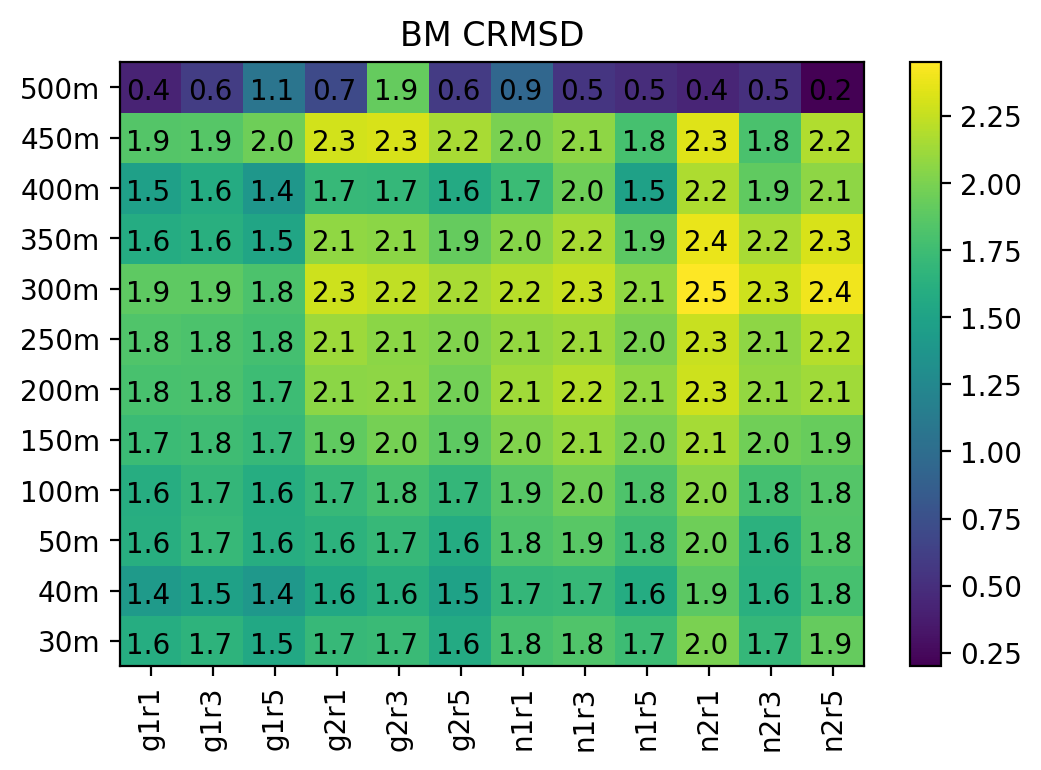

In [19]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(ncl_crmsd, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(ncl_crmsd[y,x]), (x+0.1, y+0.25))
plt.title('BM CRMSD');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

In [20]:
exns

array([[b'g1r1 30m', b'g1r3 30m', b'g1r5 30m', b'g2r1 30m', b'g2r3 30m',
        b'g2r5 30m', b'n1r1 30m', b'n1r3 30m', b'n1r5 30m', b'n2r1 30m',
        b'n2r3 30m', b'n2r5 30m'],
       [b'g1r1 40m', b'g1r3 40m', b'g1r5 40m', b'g2r1 40m', b'g2r3 40m',
        b'g2r5 40m', b'n1r1 40m', b'n1r3 40m', b'n1r5 40m', b'n2r1 40m',
        b'n2r3 40m', b'n2r5 40m'],
       [b'g1r1 50m', b'g1r3 50m', b'g1r5 50m', b'g2r1 50m', b'g2r3 50m',
        b'g2r5 50m', b'n1r1 50m', b'n1r3 50m', b'n1r5 50m', b'n2r1 50m',
        b'n2r3 50m', b'n2r5 50m'],
       [b'g1r1 100m', b'g1r3 100m', b'g1r5 100m', b'g2r1 100m',
        b'g2r3 100m', b'g2r5 100m', b'n1r1 100m', b'n1r3 100m',
        b'n1r5 100m', b'n2r1 100m', b'n2r3 100m', b'n2r5 100m'],
       [b'g1r1 150m', b'g1r3 150m', b'g1r5 150m', b'g2r1 150m',
        b'g2r3 150m', b'g2r5 150m', b'n1r1 150m', b'n1r3 150m',
        b'n1r5 150m', b'n2r1 150m', b'n2r3 150m', b'n2r5 150m'],
       [b'g1r1 200m', b'g1r3 200m', b'g1r5 200m', b'g2r1 200m',
       

In [21]:
ncl_ratio[[0,2,3,4,5],:]
        #Revisar el calculo de ratio


array([[0.84, 0.85, 0.82, 1.06, 1.03, 1.04, 1.00, 1.01, 0.99, 1.14, 1.12,
        1.14],
       [0.90, 0.92, 0.88, 1.10, 1.07, 1.07, 1.07, 1.08, 1.04, 1.18, 1.15,
        1.14],
       [1.06, 1.07, 1.03, 1.27, 1.24, 1.23, 1.26, 1.27, 1.23, 1.34, 1.30,
        1.25],
       [1.21, 1.19, 1.17, 1.40, 1.37, 1.38, 1.44, 1.43, 1.40, 1.50, 1.45,
        1.38],
       [1.21, 1.18, 1.17, 1.39, 1.35, 1.38, 1.44, 1.42, 1.40, 1.52, 1.44,
        1.42]])

In [22]:
ncl_crmsd[[0,2,3,4,5],:]

array([[1.60, 1.65, 1.55, 1.70, 1.72, 1.57, 1.79, 1.83, 1.75, 2.00, 1.70,
        1.92],
       [1.61, 1.71, 1.60, 1.64, 1.71, 1.58, 1.82, 1.86, 1.75, 1.95, 1.64,
        1.84],
       [1.60, 1.69, 1.60, 1.71, 1.79, 1.69, 1.86, 1.96, 1.82, 2.05, 1.78,
        1.85],
       [1.73, 1.76, 1.71, 1.90, 1.98, 1.89, 2.03, 2.10, 1.99, 2.15, 1.96,
        1.93],
       [1.79, 1.80, 1.74, 2.06, 2.06, 1.97, 2.13, 2.20, 2.08, 2.28, 2.08,
        2.13]])

In [23]:
ncl_ratio[[5,6,7,8,9],:]
        #Revisar el calculo de ratio


array([[1.21, 1.18, 1.17, 1.39, 1.35, 1.38, 1.44, 1.42, 1.40, 1.52, 1.44,
        1.42],
       [1.15, 1.12, 1.12, 1.35, 1.30, 1.34, 1.39, 1.36, 1.34, 1.50, 1.41,
        1.43],
       [1.05, 1.03, 1.03, 1.27, 1.23, 1.28, 1.31, 1.28, 1.25, 1.45, 1.37,
        1.38],
       [1.01, 0.98, 0.99, 1.24, 1.23, 1.27, 1.33, 1.32, 1.24, 1.52, 1.44,
        1.44],
       [0.80, 0.80, 0.78, 0.97, 0.95, 1.00, 1.03, 1.09, 0.98, 1.29, 1.21,
        1.19]])

In [24]:
ncl_crmsd[[5,6,7,8,9],:]

array([[1.79, 1.80, 1.74, 2.06, 2.06, 1.97, 2.13, 2.20, 2.08, 2.28, 2.08,
        2.13],
       [1.83, 1.81, 1.78, 2.12, 2.06, 2.02, 2.08, 2.12, 1.99, 2.26, 2.07,
        2.20],
       [1.90, 1.89, 1.81, 2.28, 2.24, 2.16, 2.21, 2.26, 2.08, 2.45, 2.28,
        2.40],
       [1.58, 1.62, 1.52, 2.08, 2.06, 1.92, 2.05, 2.16, 1.88, 2.37, 2.15,
        2.31],
       [1.47, 1.58, 1.40, 1.70, 1.70, 1.57, 1.74, 1.95, 1.49, 2.17, 1.90,
        2.07]])

In [25]:
## https://github.com/PeterRochford/SkillMetrics/blob/master/Examples/all_stats.py